# Model Evaluation

Instructor: Jhun Brian M. Andam </br>
Course: Data Mining and Application

<center><img src="figures/head.gif" alt="Evaluation Metrics in Machine Learning 101
"/></center>

> Model evaluation is the process of using different evaluation metrics to understand a machine learning model’s performance, as well as its strengths and weaknesses. Model evaluation is important to assess the efficacy of a model during initial research phases, and it also plays a role in model monitoring.
> - https://domino.ai/data-science-dictionary/model-evaluation


<div class="alert alert-block alert-info"><b>🤔 Recall: </b>Before we dive into the process of evaluating a model, let's first recall what we have learned so far.</div>

- What are the types of machine learning methods?
- What models have we used for supervised learning?
- Difference between classification and regression models?


**For starter:** Imagine that a person claims that he has built a model with 99.83% accuracy. Should we just go ahead and productionize that model? He also claims that his model can classify whether a given transaction is fraudulent or not with "state-of-the-art accuracy". Does that mean we have the perfect classifier?
<center><img src="figures/bob.gif"></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
sns.set_theme(font='Times New Roman')

<center><a href="https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6"><img src="figures/validation_types.png" width=500></a></center>

### **Holdout Validation**

Holdout is the simplest approach. It is used in neural networks as well as in many classifiers.  In this technique, the dataset is divided into train and test datasets. The dataset is usually divided into ratios like 70:30 or 80:20. Normally a large percentage of data is used for training the model and a small portion of the dataset is used for testing the model.

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


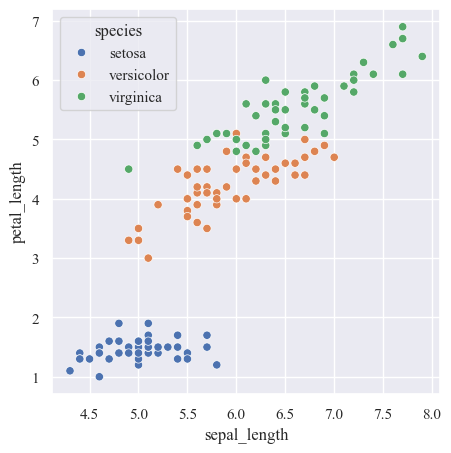

In [3]:
plt.figure(figsize=(5, 5))
sns.scatterplot(df, x='sepal_length', y='petal_length', hue='species');

The dataset `df` has a shape of `(150, 5)`, we can apply a `Holdout` method for us to validate the model.

In [3]:
df.shape

(150, 5)

In [13]:
np.random.seed(42)

# shuffle the dataset
data = df.sample(150)

# make a class map using dictionary comprehension
class_map = {val:key for key, val in enumerate(data['species'].unique())}

In [14]:
# replace the categorical values into a numerical ones by
# applying the class_map
data['species'] = data['species'].map(class_map)

In [20]:
train_size = 0.75

# syntax: dataframe.iloc[all rows (:) until (len(holdout) * train_size) and all columns]
train_data = data.iloc[:int(len(data) * train_size), :]

# syntax: dataframe.iloc[last row element until (len(holdout) - len(train_data)) and all columns]
test_data = data.iloc[-(len(data) - len(train_data)):, :]

In [22]:
X_train, y_train = train_data.iloc[:, :-1], train_data['species']
X_test, y_test = test_data.iloc[:, :-1], test_data['species']

In [25]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### **Cross Validation**

Cross Validation is a method in which we do not use the whole dataset for training. In this technique, some part of the dataset is reserved for testing the model. There are many types of Cross-Validation out of which `K-Fold Cross Validation` is mostly used. In `K-Fold Cross Validation` the original dataset is divided into k subsets. The subsets are known as folds. This is repeated k times where 1 fold is used for testing purposes. Rest k-1 folds are used for training the model. So each data point acts as a test subject for the model as well as acts as the training subject. It is seen that this technique generalizes the model well and reduces the error rate.



In [27]:
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

In [31]:
indices = kfold_indices(data, 7)

In [32]:
data = data.reset_index(drop=True)
n_neighbors = range(1, 10+1)

for fold, idx in enumerate(indices):
    fold += 1
    train_idx, test_idx = idx
    train_df, test_df = data.loc[train_idx], data.loc[test_idx]
    X_train, y_train = train_df.iloc[:, :-1], train_df.iloc[:, -1]
    X_test, y_test = test_df.iloc[:, :-1], test_df.iloc[:, -1]
    print(f"FOLD {fold}:")
    for n in n_neighbors:
        clf_kfold = KNeighborsClassifier(n_neighbors=n)
        clf_kfold.fit(X_train, y_train)
        print("n_neighbor: {:^5} accuracy: {:^5}".format(n, round(clf_kfold.score(X_test, y_test), 3)))

FOLD 1:
n_neighbor:   1   accuracy:  1.0 
n_neighbor:   2   accuracy:  1.0 
n_neighbor:   3   accuracy:  1.0 
n_neighbor:   4   accuracy:  1.0 
n_neighbor:   5   accuracy:  1.0 
n_neighbor:   6   accuracy:  1.0 
n_neighbor:   7   accuracy: 0.952
n_neighbor:   8   accuracy:  1.0 
n_neighbor:   9   accuracy:  1.0 
n_neighbor:  10   accuracy:  1.0 
FOLD 2:
n_neighbor:   1   accuracy:  1.0 
n_neighbor:   2   accuracy:  1.0 
n_neighbor:   3   accuracy:  1.0 
n_neighbor:   4   accuracy:  1.0 
n_neighbor:   5   accuracy:  1.0 
n_neighbor:   6   accuracy:  1.0 
n_neighbor:   7   accuracy:  1.0 
n_neighbor:   8   accuracy:  1.0 
n_neighbor:   9   accuracy:  1.0 
n_neighbor:  10   accuracy:  1.0 
FOLD 3:
n_neighbor:   1   accuracy: 0.952
n_neighbor:   2   accuracy: 0.952
n_neighbor:   3   accuracy: 0.952
n_neighbor:   4   accuracy: 0.952
n_neighbor:   5   accuracy: 0.952
n_neighbor:   6   accuracy: 0.952
n_neighbor:   7   accuracy: 0.952
n_neighbor:   8   accuracy: 0.952
n_neighbor:   9   accura

### **Evaluation of Classifiers** 

*Labeled Dataset | Categorical | Discrete*

> There are many ways for measuring classification performance. Accuracy, confusion matrix, log-loss, and AUC-ROC are some of the most popular metrics. Precision-recall is a widely used metrics for classification problems. </br>
> https://www.analyticsvidhya.com/blog/2021/07/metrics-to-evaluate-your-classification-model-to-take-the-right-decisions/

- **Accuracy**

\begin{equation}
    \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
\end{equation}

- Out of 1000 samples for the test dataset for email fraud detection `(spam is positive, not spam is negative)`, `450` were correctly detected as `spam emails` and `475` were correctly predicted as `not spam emails`.

\begin{equation}
    \text{Test Accuracy} = \frac{450 + 475}{1000}
\end{equation}
\begin{equation}
    \text{Test Accuracy} = 0.925 \ \text{or 92.5\%}
\end{equation}

The well known `classification accuracy` score is actually derived from confusion matrix. Confusion matrix, also known as error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one.

<table>
    <thead>
        <tr>
            <th colspan="3">Monthly Savings</th>
        </tr>
        <tr>
            <td></td>
            <td>Positive</td>
            <td>Negative</td>
        </tr>
    </thead>
    <tr>
        <td>Positive</td>
        <td>450</td>
        <td>50</td>
    </tr>
    <tr>
        <td>Negative</td>
        <td>25</td>
        <td>475</td>
    </tr>
</table>

Or typically written with the positive and negative notations.

<table>
    <thead>
        <tr>
            <td></td>
            <td>Positive</td>
            <td>Negative</td>
        </tr>
    </thead>
    <tr>
        <td>Positive</td>
        <td>TP</td>
        <td>FP (Type I Error)</td>
    </tr>
    <tr>
        <td>Negative</td>
        <td>FN (Type II Error)</td>
        <td>TN</td>
    </tr>
</table>

- True Positive: Corectly predicted positive class (spam)
- False Positive: Incorrectly predicted positive class (spam predicted as not spam)
- True Negative: Cortrectly predicted negative class (not spam)
- False Negative: Incorrectly predicted negative class (not spam predicted as spam)

Accuracy is the ratio of correctly predicted instances to the total instances and is expressed as a percentage.

**Other Classification Metrics Derived from Confusion Matrix**

\begin{equation}
    \text{Sensitivity (TPR)} = \frac{TP}{TP + FN}
\end{equation}

- **Sensitivity or Recall** (True Positive Rate) is the probability of a positive test result, conditioned on the individual truly being positive.

\begin{equation}
    \text{Specificity (TNR)} = \frac{TN}{TN + FP}
\end{equation}

- **Specificity** (True Negative Rate) is the probability of a negative test result, conditioned on the individual truly being negative.

\begin{equation}
    \text{Precision (PPV)} = \frac{TP}{TP + FP}
\end{equation}

- **Precision** (Positive Predictive Value) is particularly relevant when you want to evaluate how well a model performs in terms of correctly predicting positive instances.

\begin{equation}
    \text{Negative Predictive Value} = \frac{TN}{TN + FN}
\end{equation}

- **Negative Predictive Value (NPV)** is a performance metric that assesses the accuracy of the model's predictions for the negative class.

\begin{equation}
    \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
\end{equation}

- **F1 score** is the harmonic mean of the precision and recall. It thus symmetrically represents both precision and recall in one metric.

### Summary

<table>
  <tr>
    <th>Metric</th>
    <th>Indication</th>
    <th>When to Use</th>
  </tr>
  <tr>
    <td>Accuracy</td>
    <td>Overall correctness of predictions</td>
    <td>Balanced classes; when misclassification costs are equal for both classes</td>
  </tr>
  <tr>
    <td>Sensitivity (Recall)</td>
    <td>Ability to correctly identify positive instances</td>
    <td>Emphasis on minimizing false negatives; detecting all positive instances</td>
  </tr>
  <tr>
    <td>Specificity</td>
    <td>Ability to correctly identify negative instances</td>
    <td>Emphasis on minimizing false positives; detecting all negative instances</td>
  </tr>
  <tr>
    <td>Precision</td>
    <td>Accuracy of positive predictions</td>
    <td>Emphasis on minimizing false positives; cost of false positives is high</td>
  </tr>
  <tr>
    <td>Negative Predictive Value</td>
    <td>Accuracy of negative predictions</td>
    <td>Emphasis on minimizing false negatives; cost of false negatives is high</td>
  </tr>
  <tr>
    <td>F1 Score</td>
    <td>Harmonic mean of precision and recall</td>
    <td>When there's an imbalance between precision and recall; considers both false positives and negatives</td>
  </tr>
</table>


### Laboratory Activity 2.2:

1. Access the following dataset from kaggle and train a machine learning model to predict if a user account is legitimate or fake through facebook online engagements or activities.
    - https://www.kaggle.com/code/jhunbrianandam/classifying-facebook-accounts/input
    - Use KNNClassifier for this activity.
2. Evaluate the model's performance using a single holdout set (70:30).
3. Evaluate the model's performance using k-fold cross validation (7 folds).
4. You must use all the provided metrics for classification.

### Lecture Activity 2.2:

1. Research the ROC-AUC metrics for classification, understand what this metric indicates, and identify when it is more appropriate as a performance indicator.
2. Try implementing the ROC-AUC metric on the Facebook accounts dataset.


